In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
dataset = df.iloc[:,1:]

In [4]:
dataset.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
dataset.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
input_data = dataset.iloc[:,:-1]
ouptut_data = dataset.iloc[:,-1]

In [8]:
# ss = StandardScaler()
# ss.fit_transform(input_data)

# Solve error

In [9]:
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard',
            'IsActiveMember','EstimatedSalary']
cat_cols = ['Surname','Geography','Gender']

In [10]:
input_data = dataset[num_cols]
output_data = dataset.iloc[:,-1]

In [11]:
ss = StandardScaler()
ss.fit_transform(input_data)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]], shape=(10000, 8))

In [12]:
input_data = pd.DataFrame(ss.fit_transform(input_data), columns= input_data.columns)

In [13]:
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [14]:
input_data.shape

(10000, 8)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 10)

In [16]:
x_train.shape

(8000, 8)

In [17]:
x_test.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723


In [60]:
import tensorflow
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.models import Sequential
# from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [37]:
# import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install keras

In [61]:
ann = Sequential()

In [28]:
# warining
# ann.add(Dense(6 ,input_dim = 8, activation="relu"))
# ann.add(Dense(4, activation="relu"))
# ann.add(Dense(2, activation="relu"))
# ann.add(Dense(1, activation="sigmoid"))

In [29]:
# Correct without regularization
# # recommended
# from keras.layers import Dense, Input

# # First layer with Input
# ann.add(Input(shape=(8,)))   # 8 features as input
# ann.add(Dense(6, activation="relu"))

# # Hidden layers
# ann.add(Dense(4, activation="relu"))
# ann.add(Dense(2, activation="relu"))

# # Output layer
# ann.add(Dense(1, activation="sigmoid"))

In [30]:
# # recommended with normal regularization
# from keras.layers import Dense, Input

# # First layer with Input
# ann.add(Input(shape=(8,)))   # 8 features as input
# ann.add(Dense(6, activation="relu", kernel_regularizer=L2(l2=0.01)))

# # Hidden layers
# ann.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))

# # Output layer
# ann.add(Dense(1, activation="sigmoid"))

In [31]:
# # recommended with batch regularization
# from keras.layers import Dense, Input

# # First layer with Input
# ann.add(Input(shape=(8,)))   # 8 features as input
# ann.add(Dense(6, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(BatchNormalization())

# # Hidden layers
# ann.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(BatchNormalization())
# ann.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(BatchNormalization())

# # Output layer
# ann.add(Dense(1, activation="sigmoid"))

In [32]:
# # recommended with Dropout
# from keras.layers import Dense, Input

# # First layer with Input
# ann.add(Input(shape=(8,)))   # 8 features as input
# ann.add(Dense(6, activation="relu", kernel_regularizer=L2(l2=0.01)))
# # ann.add(Dropout(0.5))

# # Hidden layers
# ann.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
# # ann.add(Dropout(0.5))
# ann.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.3))

# # Output layer
# ann.add(Dense(1, activation="sigmoid"))

In [62]:
# recommended with Hyperparameter
# from keras.layers import Dense, Input

# First layer with Input
ann.add(Input(shape=(8,)))   # 8 features as input
ann.add(Dense(6, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))

# Hidden layers
ann.add(Dense(5, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
ann.add(Dense(4, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.3))
ann.add(Dense(3, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.3))
ann.add(Dense(2, activation="relu", kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.3))

# Output layer
ann.add(Dense(1, activation="sigmoid"))

In [63]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [262]:
# ann.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test, y_test)) # This is correct without callbacks
# ann.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test, y_test), callbacks=EarlyStopping) # Callbaskcs error

In [64]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [65]:
ann.fit(x_train, y_train, batch_size=40, epochs=100, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7981 - loss: 0.7927 - val_accuracy: 0.7890 - val_loss: 0.7207
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7981 - loss: 0.6710 - val_accuracy: 0.7890 - val_loss: 0.6347
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7981 - loss: 0.6048 - val_accuracy: 0.7890 - val_loss: 0.5873
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7981 - loss: 0.5673 - val_accuracy: 0.7890 - val_loss: 0.5600
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7981 - loss: 0.5446 - val_accuracy: 0.7890 - val_loss: 0.5434
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7981 - loss: 0.5300 - val_accuracy: 0.7890 - val_loss: 0.5325
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7981 - loss: 0.5204 - val_accuracy: 0.7890 - val_loss: 0.5257
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7981 - loss: 0.5140 - val_acc

In [265]:
# ann.history.history

In [66]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

In [67]:
len(test_accuracy)

19

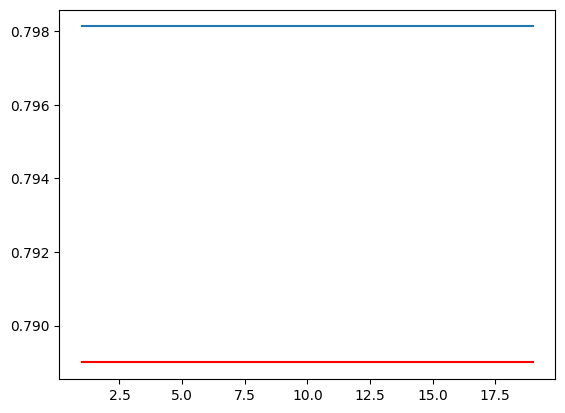

In [71]:
plt.plot([i for i in range(1, 20)], train_accuracy)
plt.plot([i for i in range(1, 20)], test_accuracy, c='red')
plt.show()

In [72]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [73]:
prd

array([[0.2113808],
       [0.2113808],
       [0.2113808],
       ...,
       [0.2113808],
       [0.2113808],
       [0.2113808]], shape=(2000, 1), dtype=float32)

In [74]:
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [75]:
# prd_data

In [76]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [77]:
# prd_data1

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, prd_data) * 100

78.9

In [80]:
accuracy_score(y_train, prd_data1) * 100

79.8125

In [81]:
# Testing New data
import numpy as np
x = np.array([[-0.564197,-0.660018,-0.695982,0.324119,
               0.807737,-1.547768,-1.03067,-1.013811]])
prdn = ann.predict(x) #Accept 1/8 array
prd_datan = []
for i in prdn:
    if i[0] > 0.5:
        prd_datan.append(1)
    else:
        prd_datan.append(0)
prd_datan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


[0]

In [82]:
y_test.head(1)

937    0
Name: Exited, dtype: int64